In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 71s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

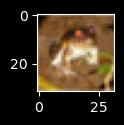

In [8]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

plot_sample(0)

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [10]:
classes[y_train[0][0]]

'frog'

In [11]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [12]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [14]:
32*32*3

3072

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
   4/1563 [..............................] - ETA: 26s - loss: 27.3617 - accuracy: 0.1016

2024-06-17 20:26:08.924627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 23s 14ms/step - loss: 16.9590 - accuracy: 0.1604
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 14.9366 - accuracy: 0.1765
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 14.5156 - accuracy: 0.1808
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 15.0014 - accuracy: 0.1829
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 16.5717 - accuracy: 0.1773
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 19.2711 - accuracy: 0.1784
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 19.2416 - accuracy: 0.1802
Epoch 8/10
1563/1563 [==============================] - 23s 14ms/step - loss: 18.3983 - accuracy: 0.1836
Epoch 9/10
1563/1563 [==============================] - 23s 14ms/step - loss: 17.8853 - accuracy: 0.1827
Epoch 10/10
1563/1563 [==============================] - 23s 14ms/

In [19]:
model.evaluate(X_test_scaled, y_test_categorical)

 17/313 [>.............................] - ETA: 1s - loss: 32.6980 - accuracy: 0.0901 

2024-06-17 20:31:01.346397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 30.8929 - accuracy: 0.1197


[30.892940521240234, 0.11969999969005585]